## 数据预处理

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
dpn = pd.read_excel('../input/DPN/10.25-DPN患者信息表.xlsx',sheet_name='总表')
dpn.loc[0,'分组（1=DPN组，0=非DPN组）'] = '分组'
dpn.columns = dpn.loc[0]
dpn.drop(index=0,axis=0,inplace=True)
dpn.reset_index(drop=True,inplace=True)
dpn.columns

Index(['分组', '流水号', '姓名', '病案号', '性别', '年龄', '入院日期', '身高', '体重', '病程',
       ...
       '游离前列腺特异抗原', '睾酮', '雌二醇', '促黄体生成素', '促卵泡成熟素', '孕酮', '血清泌乳素', 'NLR',
       'PLR', '胰岛素抵抗指数'],
      dtype='object', name=0, length=193)

In [3]:
pink = ['性别','年龄','身高','体重','糖尿病性肾病','糖尿病性视网膜病变','高脂血症','高血压','动脉粥样硬化','血常规_白细胞计数','血红蛋白','单核细胞绝对值','嗜酸性粒细胞绝对值','嗜碱性粒细胞绝对值','血小板平均体积','天冬氨酸氨基转移酶','丙氨酸氨基转移酶','白蛋白','总胆红素','尿素','肌酐','血清碳酸氢盐','尿酸','脂肪酶','总胆固醇','甘油三酯','高密度脂蛋白胆固醇','载脂蛋白A1','载脂蛋白B','载脂蛋白E','低密度脂蛋白胆固醇','脂蛋白a','糖化血清蛋白','糖化血红蛋白','促甲状腺激素','凝血酶原时间（PT）','活化部分凝血活酶时间（APTT）','白细胞','尿蛋白','葡萄糖','尿蛋白定量','24h尿蛋白定量','24小时尿量','餐后30分钟C肽','餐后30分钟胰岛素','餐后60分钟C肽','餐后60分钟胰岛素','餐后120分钟胰岛素','病程','C2/C0']
red = ['血小板','中性粒细胞绝对值','淋巴细胞绝对值','糖','空腹胰岛素']
end = ['NLR','PLR','胰岛素抵抗指数']
y = ['分组']
print(f'粉色的有:{len(pink)}列')
print(f'红色的有:{len(red)}列')
print(f'追加的有:{len(end)}列')

粉色的有:50列
红色的有:5列
追加的有:3列


In [4]:
dpn = dpn[y+pink+end]
dpn.replace('-----',np.nan,inplace=True)
dpn.replace('/',np.nan,inplace=True)
dpn['身高']=dpn['身高'].copy().replace('未测',np.nan)
dpn['体重']=dpn['体重'].copy().replace('未测',np.nan)
dpn.head()

,分组,性别,年龄,身高,体重,糖尿病性肾病,糖尿病性视网膜病变,高脂血症,高血压,动脉粥样硬化,...,餐后30分钟C肽,餐后30分钟胰岛素,餐后60分钟C肽,餐后60分钟胰岛素,餐后120分钟胰岛素,病程,C2/C0,NLR,PLR,胰岛素抵抗指数
0,1.0,女,75,158,70,1.0,0.0,1.0,1.0,1.0,...,NaN,NaN,1.72,77.01,70.92,20.0,2.574803,2.956284,121.311475,NaN
1,1.0,女,65,156,75,1.0,0.0,1.0,1.0,1.0,...,1.23,55.18,3.85,40.98,40.18,16.0,2.547511,3.714286,140.000000,4.815893
2,1.0,男,69,160,70,1.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,98.63,30.0,2.670213,1.893204,80.582524,8.718578
3,0.0,男,15,190,82,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.847561,110.975610,7.263013
4,0.0,男,73,165,77,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,13.95,284.20,189.96,11.0,3.948127,2.211982,105.069124,NaN


<AxesSubplot:xlabel='0'>

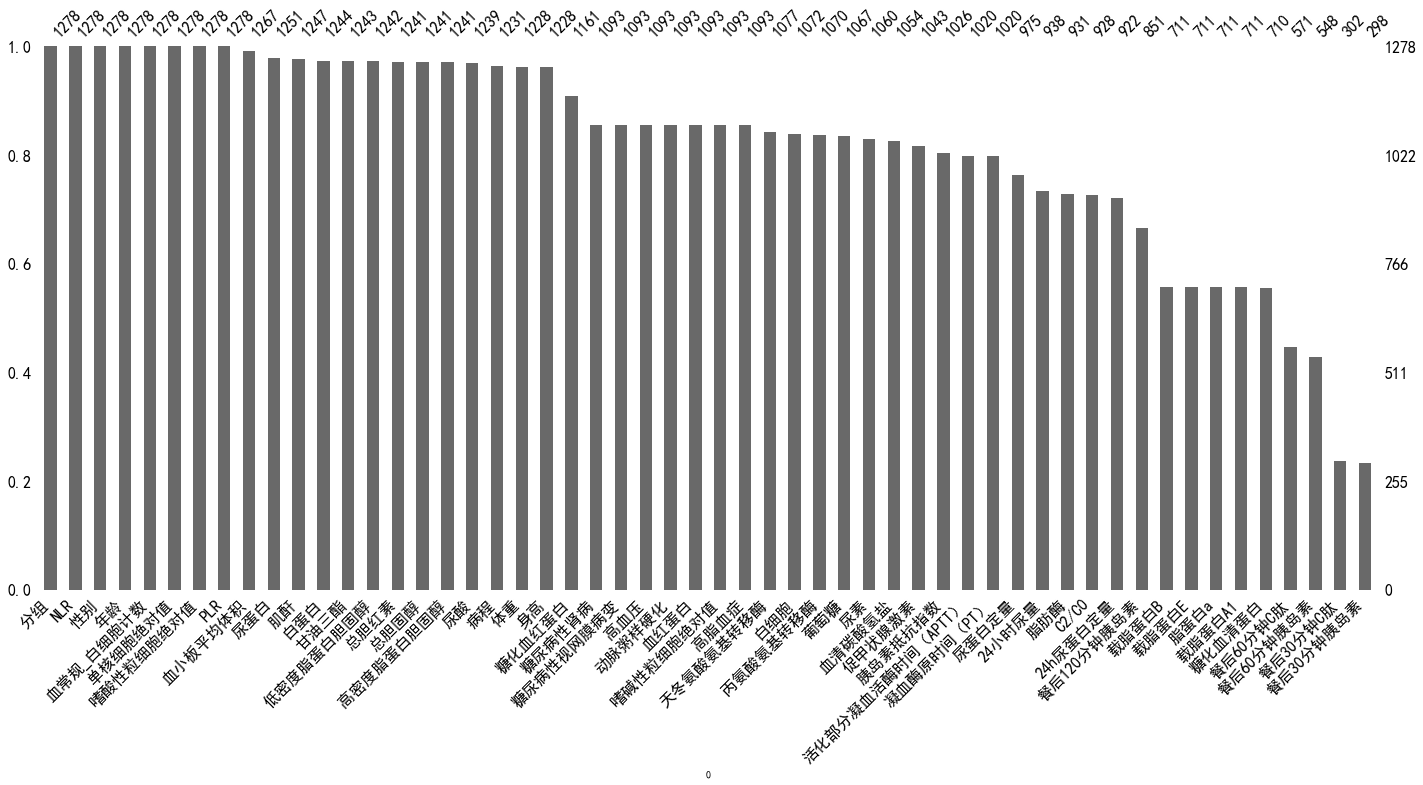

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

msno.bar(dpn,labels=True,sort='descending')

In [6]:
dpn.drop(columns=['餐后30分钟C肽','餐后30分钟胰岛素'],inplace=True)
dpn.drop(columns=['餐后60分钟C肽','餐后60分钟胰岛素','糖化血清蛋白','脂蛋白a','载脂蛋白E','载脂蛋白B','载脂蛋白A1','餐后120分钟胰岛素'],inplace=True)
dpn.replace(to_replace=r'<',value=0,regex=True,inplace=True) # < 0.01 ===> 0
dpn.replace(to_replace=r'>',value=1000,regex=True,inplace=True) # > 1000.00 ===> 1000
from collections import Counter
Counter(dpn['分组'])

Counter({1.0: 748, 0.0: 530})

<AxesSubplot:xlabel='0'>

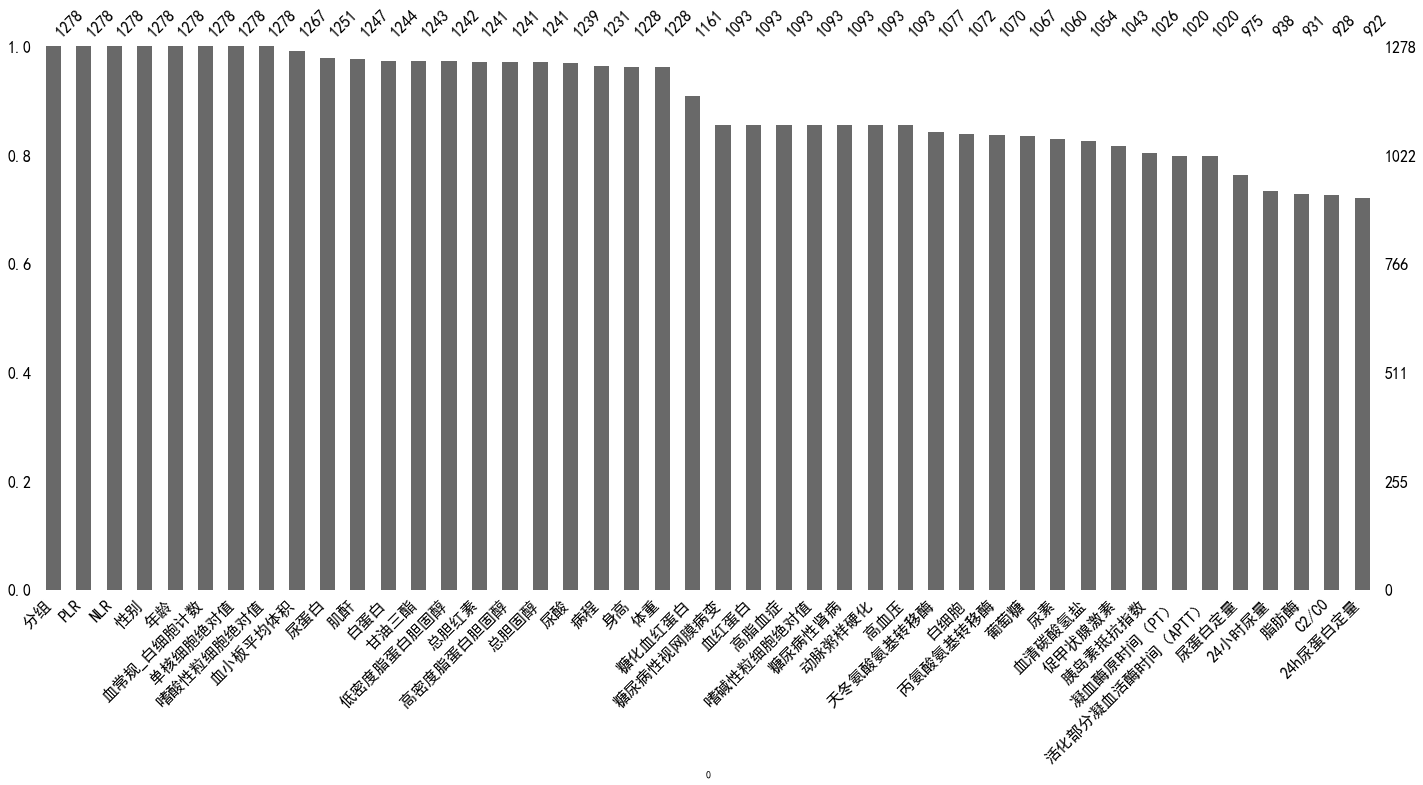

In [7]:
msno.bar(dpn,labels=True,sort='descending')

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dpn['性别']=le.fit_transform(dpn['性别'])
print('性别 类别：',le.classes_)



dpn['白细胞'] = dpn['白细胞'].copy().replace(['+','++','+++','0-1','2-3','弱阳性'],'阳性(+)')
dpn['白细胞'] = dpn['白细胞'].replace(['未见'],'阴性(-)')
dpn['白细胞']=le.fit_transform(dpn['白细胞'])
print('白细胞 类别',le.classes_)

dpn['尿蛋白'] = dpn['尿蛋白'].copy().replace(['+','++','+++','++++','弱阳性'],'阳性(+)')
dpn['尿蛋白']=le.fit_transform(dpn['尿蛋白'])
print('尿蛋白 类别',le.classes_)

dpn['葡萄糖'] = dpn['葡萄糖'].copy().replace(['+','++','+++','++++','15.4','18.5','19.7','21.0','6.9','弱阳性'],'阳性(+)')
dpn['葡萄糖']=le.fit_transform(dpn['葡萄糖'])
print('葡萄糖 类别',le.classes_)


for col in dpn.columns:
    dpn[col]=dpn[col].astype(float)

性别 类别： ['女' '男']
白细胞 类别 ['阳性(+)' '阴性(-)' nan]
尿蛋白 类别 ['-' '阳性(+)' '阴性(-)' nan]
葡萄糖 类别 ['阳性(+)' '阴性(-)' nan]


In [9]:
# dpn['肌酐'][(dpn['肌酐']<10)| (dpn['肌酐']>110)] = 1
# dpn['肌酐'][(dpn['肌酐']>=10) & (dpn['肌酐']<=110)] = 0
# msno.bar(dpn,sort='descending')

In [10]:
dpn.to_excel('../output/dpn/data/dpn_before_filled.xlsx',index=False)

In [11]:
dpn.fillna(method='ffill',inplace=True)
dpn.fillna(method='bfill',inplace=True)

dpn.to_csv('../output/dpn/data/dpn_preprocress.csv',index=False)
dpn.isna().sum().sum()

0

## 特征筛选和数据平衡

In [12]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from loguru import logger
from sklearn.model_selection import StratifiedKFold
import optuna
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import shap
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置中易黑体字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
warnings.filterwarnings('ignore')

optuna.logging.set_verbosity(optuna.logging.CRITICAL)
id2feature = {
    0:'非DPN组',
    1:'DPN组'
}
dpn = pd.read_csv('../output/dpn/data/dpn_preprocress.csv')
X = dpn.drop(columns='分组')
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y = dpn['分组'].astype(int)
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)
# print(Counter(y_train),Counter(y_test))
logger.add('./log/dpn/{time}_end.log')
USE_chi2, USE_f_classif, USE_mutual_info_classif = False, False, False
USE_LSVC,USE_EXTRATREE,USE_LR = False,True,True
k = 15
C = 0.025
penality = 'l2'
random_state = 64
if USE_chi2:
    chi2_model = SelectKBest(chi2, k=k)
    X = pd.DataFrame(chi2_model.fit_transform(
        X, y), columns=X.columns[chi2_model.get_support()])
    logger.info(f'使用 卡方检验 k={k} 进行特征筛选,剩余{X.shape}个特征')
elif USE_f_classif:
    f_classif_model = SelectKBest(f_classif, k=k)
    X = pd.DataFrame(f_classif_model.fit_transform(
        X, y), columns=X.columns[f_classif_model.get_support()])
    logger.info(f'使用 F检验 k={k} 进行特征筛选,剩余{X.shape}个特征')
elif USE_mutual_info_classif:
    mutual_info_classif_model = SelectKBest(mutual_info_classif, k=k)
    X = pd.DataFrame(mutual_info_classif_model.fit_transform(X, y),
                     columns=X.columns[mutual_info_classif_model.get_support()])
    logger.info(f'使用 互信息法 k={k} 进行特征筛选,剩余{X.shape}个特征')
elif USE_LSVC:
    from sklearn.svm import LinearSVC
    from sklearn.feature_selection import SelectFromModel
    lsvc = LinearSVC(C=C, penalty=penality, dual=False,
                     random_state=random_state)
    model = SelectFromModel(lsvc, prefit=True)
    X = pd.DataFrame(model.fit_transform(X,y),columns=X.columns[model.get_support()])
    logger.info(f'使用嵌入法 LinearSVC 进行特征选择,剩余{X.shape}个特征')
elif USE_EXTRATREE:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_selection import SelectFromModel
    etclf =  RandomForestClassifier(n_estimators=200,max_depth=9,random_state=43).fit(X,y)
    model = SelectFromModel(etclf,prefit=True)
    print(model.estimator.feature_importances_[model.get_support()])
    X = pd.DataFrame(model.transform(X),columns=X.columns[model.get_support()])
    logger.info(f'使用嵌入法 RandomForestClassifier 进行特征选择,剩余{X.shape}个特征')
elif USE_LR:
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_selection import SelectFromModel
    lr = LogisticRegression(penalty='l1',C=C,solver='liblinear')
    model = SelectFromModel(lr)
    X = pd.DataFrame(model.fit_transform(X,y),columns=X.columns[model.get_support()])
    logger.info(f'使用嵌入法 LogisticRegression 进行特征选择,剩余{X.shape}个特征')

cols_selected = X.columns.to_list()
logger.info(f'剩余的特征是：{cols_selected}')
dpn[cols_selected+['分组']].to_csv('../output/dpn/data/dpn_selected.csv',index=False)
# 数据平衡
USE_randomDownSample, USE_Tomek_links, USE_ADASYN, USE_randomOverSample, USE_SMOTE, USE_SMOTETomek = False, False, False, False, False, True

if USE_randomDownSample:
    logger.info('使用 randomDownSample 下采样')
    sampler = RandomUnderSampler(random_state=64)
elif USE_Tomek_links:
    logger.info('使用 TomekLinks 下采样')
    sampler = TomekLinks()
elif USE_ADASYN:
    logger.info('使用 ADASYN 上采样')
    sampler = ADASYN(random_state=64)
elif USE_randomOverSample:
    logger.info('使用 randomOverSample 上采样')
    sampler = RandomOverSampler(random_state=64)
elif USE_SMOTE:
    logger.info('使用 SMOTE 上采样')
    sampler = SMOTE(random_state=64)
elif USE_SMOTETomek:
    logger.info('使用 SMOTETomek 混合采样')
    sampler = SMOTETomek(random_state=43)
else:
    assert False, '没有平衡数据'
logger.info(f'数据平衡前：{id2feature[0]}有{Counter(y)[0]}条,{id2feature[1]}有{Counter(y)[1]}条')
X_resampled, y_resampled = sampler.fit_resample(X, y)
logger.info(f'数据平衡后：{id2feature[0]}有{Counter(y_resampled)[0]}条,{id2feature[1]}有{Counter(y_resampled)[1]}条')
dpn_resampled = pd.concat([y_resampled,X_resampled],axis=1)
dpn_resampled.to_excel('../output/dpn/data/dpn_resampled.xlsx',index=False)


2022-11-08 12:01:22.716 | INFO     | __main__:<module>:75 - 使用嵌入法 RandomForestClassifier 进行特征选择,剩余(1278, 16)个特征
2022-11-08 12:01:22.718 | INFO     | __main__:<module>:85 - 剩余的特征是：['年龄', '血红蛋白', '白蛋白', '总胆红素', '尿素', '肌酐', '尿酸', '总胆固醇', '糖化血红蛋白', '活化部分凝血活酶时间（APTT）', '尿蛋白定量', '24h尿蛋白定量', '病程', 'C2/C0', 'NLR', '胰岛素抵抗指数']
2022-11-08 12:01:22.732 | INFO     | __main__:<module>:106 - 使用 SMOTETomek 混合采样
2022-11-08 12:01:22.733 | INFO     | __main__:<module>:110 - 数据平衡前：非DPN组有530条,DPN组有748条
2022-11-08 12:01:22.792 | INFO     | __main__:<module>:112 - 数据平衡后：非DPN组有700条,DPN组有700条


[0.07633809 0.02787007 0.03311759 0.02482819 0.02765363 0.02783482
 0.0266905  0.02427316 0.04305378 0.02831444 0.04941426 0.05158756
 0.05656092 0.02722289 0.02943182 0.03254248]


## 单因素方差分析

In [24]:
import numpy as np
from scipy.stats import kstest
dpnY = dpn[dpn['分组']==1]
dpnN = dpn[dpn['分组']==0]
from scipy.stats import ttest_ind,levene,mannwhitneyu
for i in cols_selected:
    kstest_statistics,kstest_p = kstest(dpn[i],'norm')
    if kstest_p>0.05:
        lf,lp = levene(dpnY[i],dpnN[i])
        if lp>0.05:
            F,p = ttest_ind(dpnY[i],dpnN[i])
            print(f'{i}\t{round(kstest_p,3)}\tlevene-f={round(lf,3)}\tlevene-p={round(lp,3)}\tdpnY-mean={round(np.mean(dpnY[i]),3)}\tdpnY-std={round(np.std(dpnY[i]),3)}\tdpnN-mean={round(np.mean(dpnN[i]),3)}\tdpnN-std={round(np.std(dpnN[i]),3)}\tF={round(F,3)}\tp={round(p,3)}')
        else:
            F,p = ttest_ind(dpnY[i],dpnN[i],equal_var=False)
            print(f'{i}\t{round(kstest_p,3)}\tlevene-f={round(lf,3)}\tlevene-p={round(lp,3)}\tdpnY-mean={round(np.mean(dpnY[i]),3)}\tdpnY-std={round(np.std(dpnY[i]),3)}\tdpnN-mean={round(np.mean(dpnN[i]),3)}\tdpnN-std={round(np.std(dpnN[i]),3)}\tF={round(F,3)}\tp={round(p,3)}')
    else:
        mw_statistics,mw_p = mannwhitneyu(dpnY[i],dpnN[i])
        print(f'{i}\tkstest-p={round(kstest_p,3)}\tdpnY={dpnY[i].quantile([0.25,0.5,0.75]).tolist()}\tdpnN={dpnN[i].quantile([0.25,0.5,0.75]).tolist()}\tF={round(mw_statistics,3)}\tp={round(mw_p,3)}')


年龄	kstest-p=0.0	dpnY=[55.0, 64.5, 72.0]	dpnN=[46.0, 56.0, 64.75]	F=266300.0	p=0.0
血红蛋白	kstest-p=0.0	dpnY=[122.0, 131.0, 145.0]	dpnN=[126.0, 138.5, 150.0]	F=157105.0	p=0.0
白蛋白	kstest-p=0.0	dpnY=[38.4, 40.8, 43.3]	dpnN=[39.5, 41.9, 43.8]	F=165246.0	p=0.0
总胆红素	kstest-p=0.0	dpnY=[7.2575, 9.86, 13.0]	dpnN=[7.8725000000000005, 10.44, 13.7875]	F=180415.5	p=0.006
尿素	kstest-p=0.0	dpnY=[4.66, 5.175, 6.88]	dpnN=[4.4825, 5.22, 6.2325]	F=213829.5	p=0.016
肌酐	kstest-p=0.0	dpnY=[56.0, 66.1, 80.25]	dpnN=[56.1, 66.75, 77.775]	F=204186.5	p=0.359
尿酸	kstest-p=0.0	dpnY=[262.0, 317.0, 376.0]	dpnN=[270.0, 318.5, 393.0]	F=188799.5	p=0.147
总胆固醇	kstest-p=0.0	dpnY=[3.5575, 4.4, 5.31]	dpnN=[3.83, 4.56, 5.26]	F=182562.5	p=0.016
糖化血红蛋白	kstest-p=0.0	dpnY=[7.3, 8.7, 10.5]	dpnN=[6.8, 8.0, 9.6]	F=235163.0	p=0.0
活化部分凝血活酶时间（APTT）	kstest-p=0.0	dpnY=[33.3, 34.0, 37.0]	dpnN=[33.3, 35.4, 38.4]	F=168108.0	p=0.0
尿蛋白定量	kstest-p=0.0	dpnY=[37.0, 55.0, 122.25]	dpnN=[26.0, 45.0, 72.0]	F=245015.5	p=0.0
24h尿蛋白定量	kstest-p=0.0	dpnY=[70.

In [14]:
zh2en = {
    '年龄':'Age' ,
    '病程':'Diabetes duration',
    '活化部分凝血活酶时间（APTT）':'Activeated partial thromboplasting time (APTT)',
    '总胆固醇':'total cholesterol(TC)',
    '尿酸':'Uric acid(UA)',
    '血红蛋白':'Hemoglobin (Hb)',
    'C2/C0':'C2/C0',
    'NLR':'NLR',
    '白蛋白':'Albumin(ALB)',
    '尿素': 'UREA',
    '胰岛素抵抗指数':'HOMA-IR',
    '肌酐':'Creatinine(Cr)',
    '24h尿蛋白定量':'24-hour urinary protein quantity',
    '总胆红素':'Total bilirubin',
    '糖化血红蛋白':'glycated hemoglobin A1C (HbA1c)',
    '尿蛋白定量':'Urine protein quantity'
}

## 模型对比

### XGBoost

In [15]:
TRAIN_XGB = False
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=43)
    param = {
        'verbosity': 0,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'exact',
        'booster': 'dart',
        'n_estimators':trial.suggest_int('n_estimators',100,500,step=50),
        'max_depth': trial.suggest_int("max_depth", 8,20,step=2),
        'grow_policy': trial.suggest_categorical("grow_policy", ['depthwise', 'lossguide']),
        'learning_rate': trial.suggest_float("learning_rate", 1e-8, 1, log=True),
        'gamma': trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'random_state': 43
    }
    clf_xgb = xgb.XGBClassifier(**param).fit(train_x, train_y)
    preds = clf_xgb.predict(valid_x)
    return accuracy_score(valid_y, preds)
study = optuna.create_study(direction="maximize")
if TRAIN_XGB:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')

In [16]:
from joblib import dump
fixed_params = {
        'verbosity': 0,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        'tree_method': 'exact',
        'n_estimators':500,
        'max_depth': 8,
        'grow_policy': 'lossguide',
        'learning_rate': 0.16988838433253076,
        'gamma': 0.8731716765537924,
        'reg_lambda':  0.0013501913428471217,
        'reg_alpha': 0.0003173545927786465,
        'subsample':  0.8207157400822733,
        'colsample_bytree': 0.6604573433687222,
        'random_state': 43
}
Accuracy = []
Precision = []
Recall = []
F1 = []
if TRAIN_XGB:
    clf_xgb = xgb.XGBClassifier(**study.best_params)
else:
    clf_xgb = xgb.XGBClassifier(**fixed_params)
logger.warning(model.get_params())
clf_xgb.fit(X_resampled,y_resampled)
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_xgb.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_xgb.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.75:
    print(f'准确率 {round(np.mean(Accuracy), 3)},保存模型...')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'XGB_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-08 12:01:23.420 | WARNING  | __main__:<module>:26 - {'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 9, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 200, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 43, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(max_depth=9, n_estimators=200, random_state=43), 'importance_getter': 'auto', 'max_features': None, 'norm_order': 1, 'prefit': True, 'threshold': None}
2022-11-08 12:01:24.741 | WARNING  | __main__:<module>:40 - 0.686	0.717	0.614	0.662
2022-11-08 12:01:25.337 | WARNING  | __main

准确率 0.761,保存模型...


#### SHAP

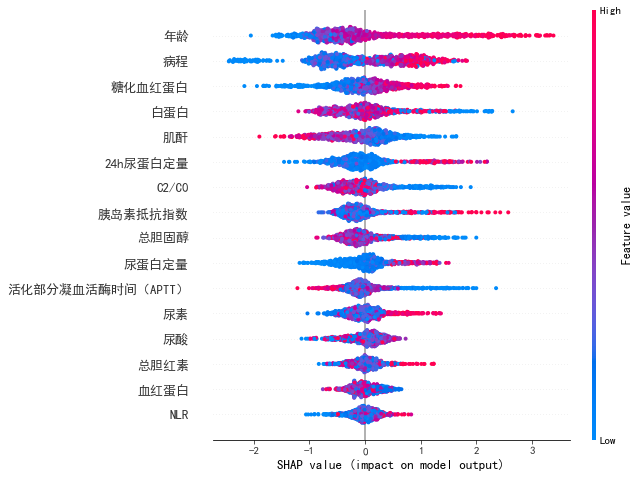

In [17]:
from sklearn.model_selection import train_test_split
data = pd.read_excel('../output/dpn/data/dpn_resampled.xlsx')
X_shap = data.drop(columns='分组')
y_shap = data['分组']
X_shap_train,X_shap_test,y_shap_train,y_shap_test = train_test_split(X_shap,y_shap,test_size=0.3,random_state=43)
clf_xgb.fit(X_shap_train,y_shap_train)
explainer = shap.TreeExplainer(clf_xgb)
shap_values_XGBoost_train = explainer.shap_values(X_shap_train)
shap.summary_plot(shap_values_XGBoost_train, X_shap_train)

#### Confusion matrix

Text(0.5, 1.0, 'XGBoost')

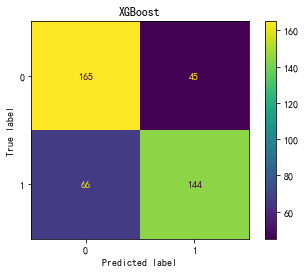

In [18]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_xgb_pred = clf_xgb.predict_proba(X_shap_test)[:,1]
xgb_fpr,xgb_tpr,_ = roc_curve(y_shap_test,clf_xgb_pred)
plot_confusion_matrix(clf_xgb,X_shap_test,y_shap_test)
plt.title('XGBoost')

#### ROC 曲线

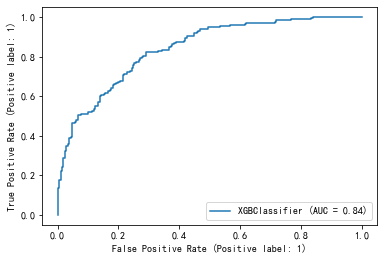

In [19]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
xgb_score = round(roc_auc_score(y_shap_test,clf_xgb_pred),3)
plot_roc_curve(clf_xgb,X_shap_test,y_shap_test)

### SVC

In [20]:
TRAIN_SVC = False
from sklearn.svm import SVC
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=43)
    param = {
        'random_state':43,
        'C':trial.suggest_float('C',1e-8,1,log=True),
        'gamma':trial.suggest_float('gamma',1e-8,1,log=True),
        'probability':True
    }
    model = SVC(**param).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)
Accuracy = []
Precision = []
Recall = []
F1 = []
study = optuna.create_study(direction="maximize")
if TRAIN_SVC:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')

In [21]:
fixed_params = {'C': 0.9899203552790449, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.8098439704037791, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 43, 'shrinking': True, 'tol': 0.001, 'verbose': False}
if TRAIN_SVC:
    clf_svc = SVC(**study.best_params)
else:
    clf_svc = SVC(**fixed_params)
logger.warning(clf_svc.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=32)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_svc.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_svc.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'SVC_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-08 12:01:31.998 | WARNING  | __main__:<module>:6 - {'C': 0.9899203552790449, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.8098439704037791, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 43, 'shrinking': True, 'tol': 0.001, 'verbose': False}
2022-11-08 12:01:32.449 | WARNING  | __main__:<module>:19 - 0.729	0.682	0.857	0.759
2022-11-08 12:01:32.861 | WARNING  | __main__:<module>:19 - 0.764	0.695	0.943	0.8
2022-11-08 12:01:33.262 | WARNING  | __main__:<module>:19 - 0.807	0.747	0.929	0.828
2022-11-08 12:01:33.661 | WARNING  | __main__:<module>:19 - 0.757	0.696	0.914	0.79
2022-11-08 12:01:34.061 | WARNING  | __main__:<module>:19 - 0.8	0.75	0.9	0.818
2022-11-08 12:01:34.462 | WARNING  | __main__:<module>:19 - 0.8	0.733	0.943	0.825
2022-11-08 12:01:34.879 | WARNING  | __main__:<module>:19 - 0.786	0.727	0.914	0.81
2022-11-08 12:01:35.299 | WARNING  | __main__:<module>:19 - 0

#### SHAP

In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_excel('../output/dpn/data/dpn_resampled.xlsx')
X_shap = data.drop(columns='分组')
X_shap.rename(columns=zh2en,inplace=True)
y_shap = data['分组']
X_shap_train,X_shap_test,y_shap_train,y_shap_test = train_test_split(X_shap,y_shap,test_size=0.7,random_state=43)
clf_svc.fit(X_shap_train,y_shap_train)
explainer = shap.KernelExplainer(clf_svc.predict,shap.sample(X_shap_train, 100,random_state=43))
shap_values_SVC_test = explainer.shap_values(X_shap_test)
shap.summary_plot(shap_values_SVC_test, X_shap_test)

  0%|          | 0/980 [00:07<?, ?it/s]


KeyboardInterrupt: 

#### Confusion maxtrix

Text(0.5, 1.0, 'SVM')

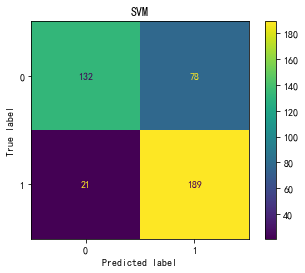

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_svc.fit(X_shap_train,y_shap_train)
clf_svc_pred = clf_svc.predict_proba(X_shap_test)[:,1]
svc_fpr,svc_tpr,_ = roc_curve(y_shap_test,clf_svc_pred)
plot_confusion_matrix(clf_svc,X_shap_test,y_shap_test)
plt.title('SVM')

#### ROC 曲线

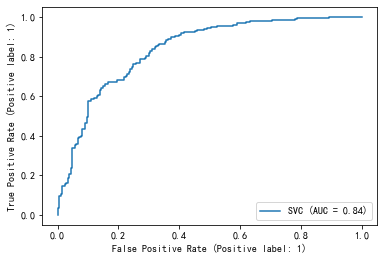

In [ ]:
from sklearn.metrics import plot_roc_curve
svc_score = round(roc_auc_score(y_shap_test,clf_svc_pred),3)
plot_roc_curve(clf_svc,X_shap_test,y_shap_test)

### LogisticRegression

In [ ]:
TRAIN_LR = False
from sklearn.linear_model import LogisticRegression
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=43)
    param = {
        'random_state':43,
        'penalty':trial.suggest_categorical("penalty", ['l2','none']),
        'C':trial.suggest_float('C',1e-8,1,log=True),
        'max_iter':trial.suggest_int('max_iter',100,5000)
    }
    model = LogisticRegression(**param).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)
study = optuna.create_study(direction="maximize")
if TRAIN_LR:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')


In [ ]:
fixed_params = {
    'random_state':43,
    'penalty':'none',
    'C':0.3856279932385604,
    'max_iter':617
}
Accuracy = []
Precision = []
Recall = []
F1 = []
if TRAIN_LR:
    clf_lr = LogisticRegression(**study.best_params)
else:
    clf_lr = LogisticRegression(**fixed_params)
logger.warning(clf_lr.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_lr.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_lr.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'LR_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-06 16:52:48.861 | WARNING  | __main__:<module>:15 - {'C': 0.3856279932385604, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 617, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': 43, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
2022-11-06 16:52:48.883 | WARNING  | __main__:<module>:28 - 0.629	0.645	0.571	0.606
2022-11-06 16:52:48.898 | WARNING  | __main__:<module>:28 - 0.65	0.657	0.629	0.642
2022-11-06 16:52:48.914 | WARNING  | __main__:<module>:28 - 0.671	0.688	0.629	0.657
2022-11-06 16:52:48.930 | WARNING  | __main__:<module>:28 - 0.671	0.676	0.657	0.667
2022-11-06 16:52:48.945 | WARNING  | __main__:<module>:28 - 0.679	0.671	0.7	0.685
2022-11-06 16:52:48.958 | WARNING  | __main__:<module>:28 - 0.721	0.725	0.714	0.719
2022-11-06 16:52:48.970 | WARNING  | __main__:<module>:28 - 0.7	0.733	0.629	0.677
2022-11-06 16:52:48.983 | WARNING  | __main__:<module>:28 - 0.657

#### Confusion matrix

Text(0.5, 1.0, 'LR')

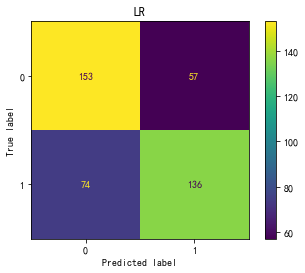

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_lr.fit(X_shap_train,y_shap_train)
clf_lr_pred = clf_lr.predict_proba(X_shap_test)[:,1]
lr_fpr,lr_tpr,_ = roc_curve(y_shap_test,clf_lr_pred)
plot_confusion_matrix(clf_lr,X_shap_test,y_shap_test)
plt.title('LR')

#### ROC曲线

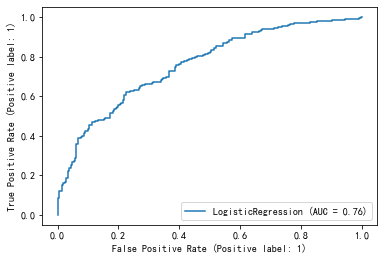

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
lr_score = round(roc_auc_score(y_shap_test,clf_lr_pred),3)
plot_roc_curve(clf_lr,X_shap_test,y_shap_test)

### RandomForest

In [ ]:
TRAIN_RF = False
from sklearn.ensemble import RandomForestClassifier
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=43)
    param = {
        'n_estimators':trial.suggest_int('n_estimators',200,500),
        'max_depth': trial.suggest_int("max_depth", 2, 10, step=2),
        'min_samples_split':trial.suggest_int("min_samples_split", 2, 10, step=1),
        'random_state':43,
    }
    model = RandomForestClassifier(**param).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)

Accuracy = []
Precision = []
Recall = []
F1 = []
study = optuna.create_study(direction="maximize")
if TRAIN_RF:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')

In [ ]:
fixed_params = {
    'n_estimators':487,
    'max_depth': 10,
    'min_samples_split': 7,
    'random_state':43,
}
if TRAIN_RF:
    clf_rf = RandomForestClassifier(**study.best_params)
else:
    clf_rf = RandomForestClassifier(**fixed_params)
logger.warning(model.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_rf.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_rf.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')

if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'RF_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-06 16:52:49.365 | WARNING  | __main__:<module>:11 - {'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 9, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 200, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 43, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(max_depth=9, n_estimators=200, random_state=43), 'importance_getter': 'auto', 'max_features': None, 'norm_order': 1, 'prefit': True, 'threshold': None}
2022-11-06 16:52:50.507 | WARNING  | __main__:<module>:24 - 0.729	0.796	0.614	0.694
2022-11-06 16:52:51.662 | WARNING  | __main

#### Confusion matrix

Text(0.5, 1.0, 'RF')

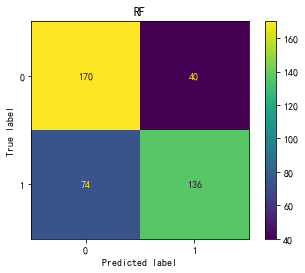

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_rf.fit(X_shap_train,y_shap_train)
clf_rf_pred = clf_rf.predict_proba(X_shap_test)[:,1]
rf_fpr,rf_tpr,_ = roc_curve(y_shap_test,clf_rf_pred)
plot_confusion_matrix(clf_rf,X_shap_test,y_shap_test)
plt.title('RF')

#### ROC 曲线

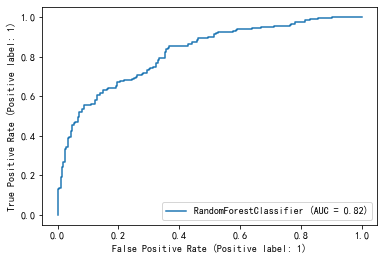

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
rf_score = round(roc_auc_score(y_shap_test,clf_rf_pred),3)
plot_roc_curve(clf_rf,X_shap_test,y_shap_test)

### Decision Tree

In [ ]:
TRAIN_DT = False
from sklearn.tree import DecisionTreeClassifier
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=43)
    param = {
        'random_state':43,
        'criterion':trial.suggest_categorical("criterion", ['gini','entropy']),
        'max_depth':trial.suggest_int('max_depth',8,18)
    }
    model = DecisionTreeClassifier(**param).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)
study = optuna.create_study(direction="maximize")
if TRAIN_DT:
    study.optimize(objective, n_trials=100, timeout=600)
    logger.info(f'调参结束，最佳结果为:{study.best_value}')
    logger.info(f'调参结束，最佳参数为:{study.best_params}')


In [ ]:
fixed_params = {
    'random_state':43,
    'criterion':'entropy',
    'max_depth':16
}
Accuracy = []
Precision = []
Recall = []
F1 = []
if TRAIN_DT:
    clf_dt = DecisionTreeClassifier(**study.best_params)
else:
    clf_dt = DecisionTreeClassifier(**fixed_params)
logger.warning(clf_dt.get_params())
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_dt.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_dt.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'LR_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-06 16:53:02.144 | WARNING  | __main__:<module>:14 - {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 16, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 43, 'splitter': 'best'}
2022-11-06 16:53:02.174 | WARNING  | __main__:<module>:27 - 0.657	0.677	0.6	0.636
2022-11-06 16:53:02.204 | WARNING  | __main__:<module>:27 - 0.743	0.766	0.7	0.731
2022-11-06 16:53:02.229 | WARNING  | __main__:<module>:27 - 0.693	0.701	0.671	0.686
2022-11-06 16:53:02.255 | WARNING  | __main__:<module>:27 - 0.643	0.661	0.586	0.621
2022-11-06 16:53:02.281 | WARNING  | __main__:<module>:27 - 0.693	0.685	0.714	0.699
2022-11-06 16:53:02.305 | WARNING  | __main__:<module>:27 - 0.679	0.719	0.586	0.646
2022-11-06 16:53:02.330 | WARNING  | __main__:<module>:27 - 0.643	0.672	0.557	0.609
2022-11-06 16:53:02.354 | WARNING  | __main__:<mod

#### Confusion matrix

Text(0.5, 1.0, 'DT')

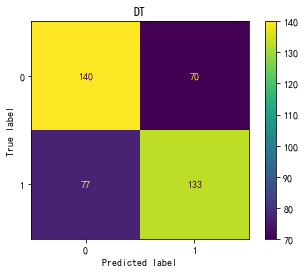

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_dt.fit(X_shap_train,y_shap_train)
clf_dt_pred = clf_dt.predict_proba(X_shap_test)[:,1]
dt_fpr,dt_tpr,_ = roc_curve(y_shap_test,clf_dt_pred)

plot_confusion_matrix(clf_dt,X_shap_test,y_shap_test)
plt.title('DT')

#### ROC曲线

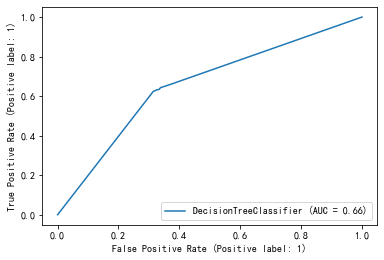

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
dt_score = round(roc_auc_score(y_shap_test,clf_dt_pred),3)
plot_roc_curve(clf_dt,X_shap_test,y_shap_test)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Accuracy = []
Precision = []
Recall = []
F1 = []
clf_knn = KNeighborsClassifier(n_neighbors=2)
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=43)
for train_index, test_index in kf.split(X_resampled,y_resampled):
    clf_knn.fit(X_resampled.loc[train_index], y_resampled[train_index])
    preds = clf_knn.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
logger.warning(f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
if round(np.mean(Accuracy), 3) >=0.8:
    from joblib import dump
    print('准确率>=0.8,保存模型...')
    dump(model,'./output/dpn/model/'+'KNN_'+str(round(np.mean(Accuracy), 3))+'.joblib')

2022-11-06 16:53:02.869 | WARNING  | __main__:<module>:19 - 0.643	0.857	0.343	0.49
2022-11-06 16:53:02.885 | WARNING  | __main__:<module>:19 - 0.729	0.944	0.486	0.642
2022-11-06 16:53:02.901 | WARNING  | __main__:<module>:19 - 0.664	0.795	0.443	0.569
2022-11-06 16:53:02.920 | WARNING  | __main__:<module>:19 - 0.629	0.781	0.357	0.49
2022-11-06 16:53:02.939 | WARNING  | __main__:<module>:19 - 0.736	0.923	0.514	0.661
2022-11-06 16:53:02.960 | WARNING  | __main__:<module>:19 - 0.736	0.946	0.5	0.654
2022-11-06 16:53:02.978 | WARNING  | __main__:<module>:19 - 0.643	0.763	0.414	0.537
2022-11-06 16:53:02.993 | WARNING  | __main__:<module>:19 - 0.707	0.914	0.457	0.61
2022-11-06 16:53:03.007 | WARNING  | __main__:<module>:19 - 0.721	0.83	0.557	0.667
2022-11-06 16:53:03.025 | WARNING  | __main__:<module>:19 - 0.714	0.857	0.514	0.643
2022-11-06 16:53:03.027 | WARNING  | __main__:<module>:21 - accuracy		mean:0.692	std:0.04
2022-11-06 16:53:03.028 | WARNING  | __main__:<module>:22 - precision		mean:

#### Confusion matrix

Text(0.5, 1.0, 'KNN')

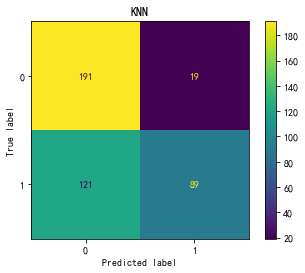

In [ ]:
from sklearn.metrics import plot_confusion_matrix,roc_curve
clf_knn.fit(X_shap_train,y_shap_train)
clf_knn_pred = clf_knn.predict_proba(X_shap_test)[:,1]
knn_fpr,knn_tpr,_ = roc_curve(y_shap_test,clf_knn_pred)

plot_confusion_matrix(clf_knn,X_shap_test,y_shap_test)
plt.title('KNN')

#### ROC 曲线

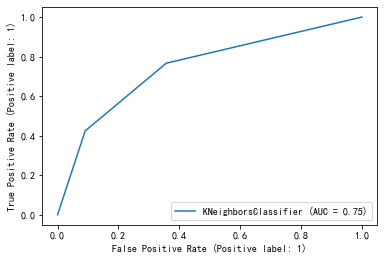

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_auc_score
knn_score = round(roc_auc_score(y_shap_test,clf_knn_pred),3)
plot_roc_curve(clf_knn,X_shap_test,y_shap_test)

## 实验结果

#### ROC曲线

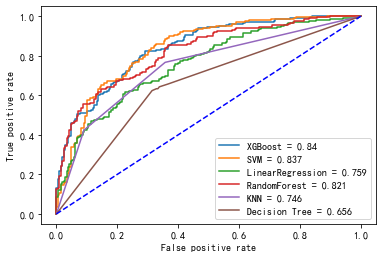

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xgb_fpr,xgb_tpr,label=f'XGBoost = {xgb_score}')
plt.plot(svc_fpr,svc_tpr,label=f'SVM = {svc_score}')
plt.plot(lr_fpr,lr_tpr,label=f'LinearRegression = {lr_score}')
plt.plot(rf_fpr,rf_tpr,label=f'RandomForest = {rf_score}')
plt.plot(knn_fpr,knn_tpr,label=f'KNN = {knn_score}')
plt.plot(dt_fpr,dt_tpr,label=f'Decision Tree = {dt_score}')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.savefig('../output/dpn/confusion matrix/roc.png',dpi=999)
plt.show()

#### Cox Regression

In [ ]:
# cph = CoxPHFitter()
# cph.fit(cox_dpn[cols_selected+['分组']],duration_col='糖化血红蛋白',event_col='分组')
# cph.print_summary()